In [28]:
include("../src/include_file.jl");

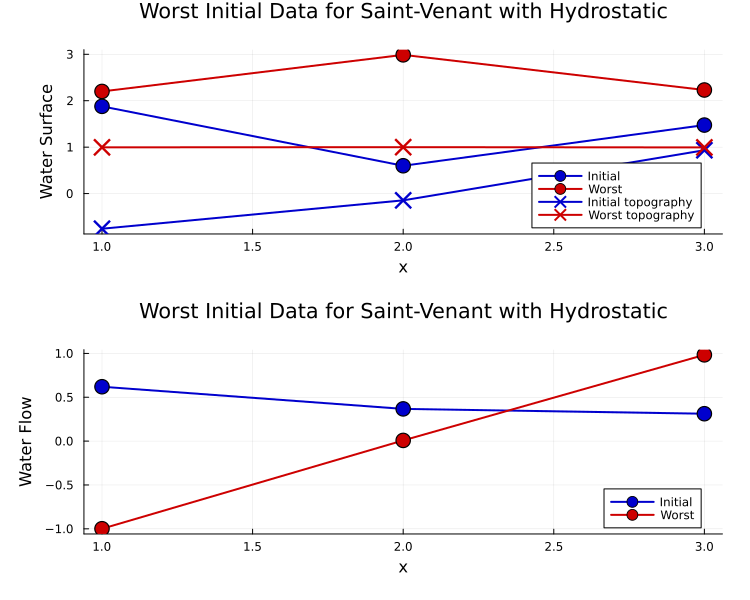

Worst value found for epsilon : -2.751813372962923


In [13]:
Nx = 100
CFL_factor = 0.5
#topoHeight = 2.0
eq = SaintVenant(flat_zb(height=0), 1e-10)

method = createHydrostatic(CFL_factor, Rusanov)
#method = Rusanov(CFL_factor)

boxBounds=[0.0 3;-1.0 1.0]
sourceBounds=[-1.0, 1.0]

sol = iterate_WID(Nx, eq, method; nb_it=1, boxBounds=boxBounds, sourceBounds=sourceBounds)

plotWorstWD(sol, eq)#, SaveMode())

# Reconstruction of the initial data from the optimization results
u_init, z = extendInitialDataToK(sol, Nx);

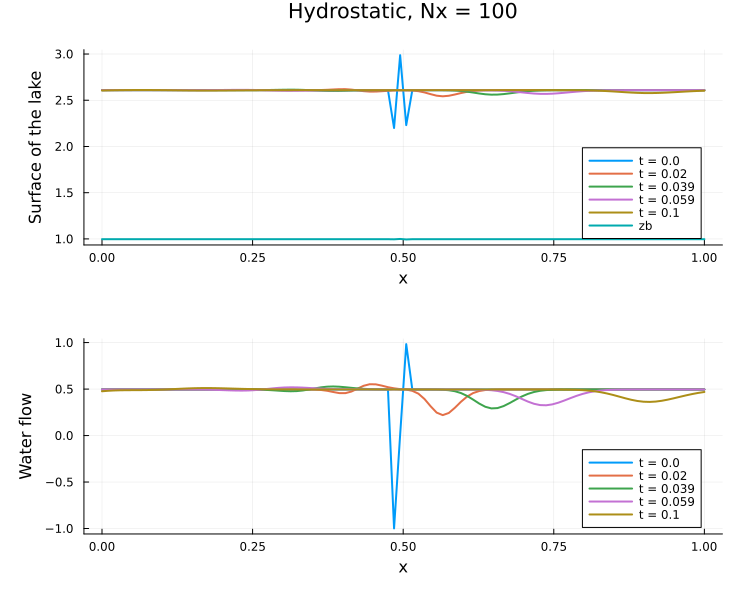

nothing

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:439 =#
                J(optimFunctional, gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.000000e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2019

(u, up, z) = ([1.6089823579624172 0.47987785755572854; 1.6103777334467295 0.48438965146602725; 1.6114425831333705 0.4871365134484425; 1.6122531213674771 0.4885321078687178; 1.6128656445207885 0.4890115828965291; 1.6133087679016613 0.4890025367814069; 1.6135839398423164 0.48890358283099394; 1.6136733801079683 0.4890628542837136; 1.6135531305074797 0.48975

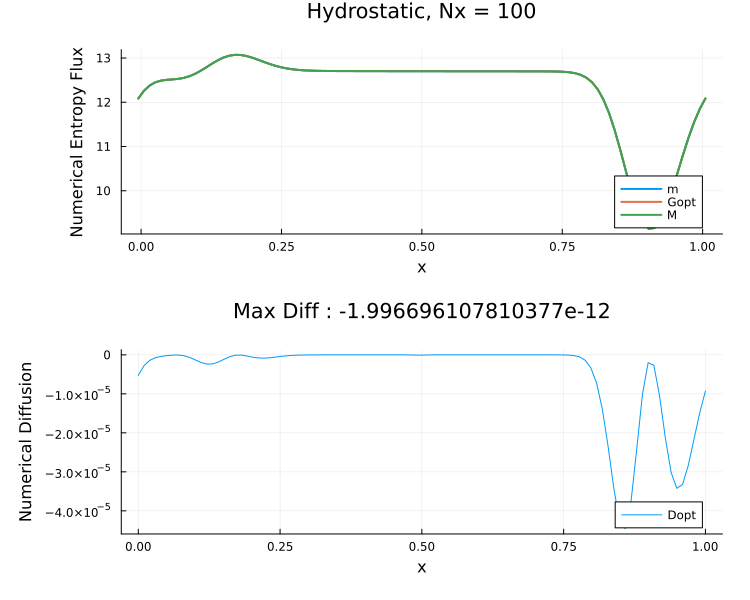

nothing

In [14]:
domain = createUnitInterval(Nx, 0.0, 0.1)
domain.sourceVec = z

# Solving Saint-Venant for this data
fv_sol = fv_solve(domain, u_init, eq, method)
display(plot_fv_sol(fv_sol, eq, nb_plots=5))

# Optimization process

solEnt = optimize_for_entropy(u_init, domain, eq, method)
display(plot_solution(solEnt))

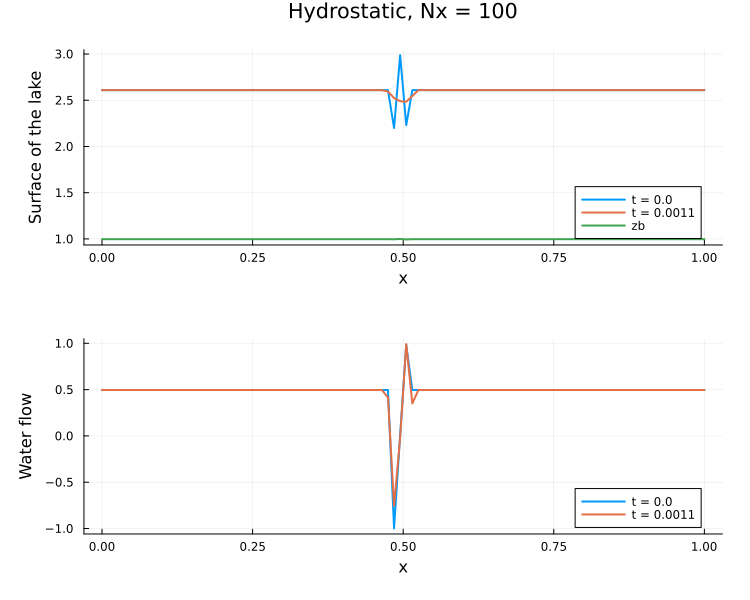

nothing

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:439 =#
                J(optimFunctional, gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: success

 * Candidate solution
    Final objective value:     1.000000e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   2  (vs limit Inf)
    Iterations:    5250
    f(x) calls:    8220

(u, up, z) = ([1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.49573687

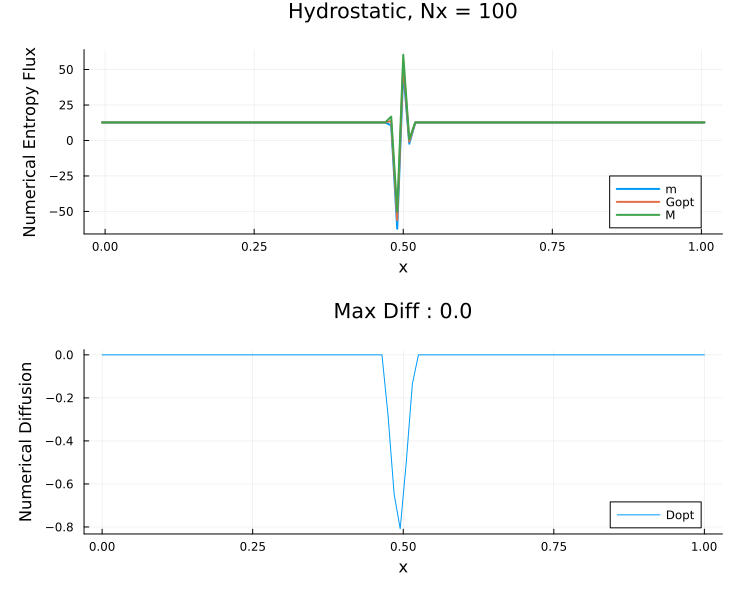

nothing

In [15]:
# Now we would like to solve the equation for one timestep only - the same that was used during the WID research

domain = createUnitInterval(Nx, 0.0, 0.1)
dt = sol.method.CFL_factor * domain.dx / CFL_cond(sol.equation, u_init) # Timestep given by CFL condition

# Redefining the domain with dt as final time
domain = createUnitInterval(Nx, 0.0, dt)
domain.sourceVec = z

# Solving Saint-Venant for this data
fv_sol = fv_solve(domain, u_init, eq, method)
display(plot_fv_sol(fv_sol, eq, nb_plots=2))

# Optimization process

solEnt = optimize_for_entropy(u_init, domain, eq, method; iterations=100000)#, modifiedDataType=maxK())
display(plot_solution(solEnt))

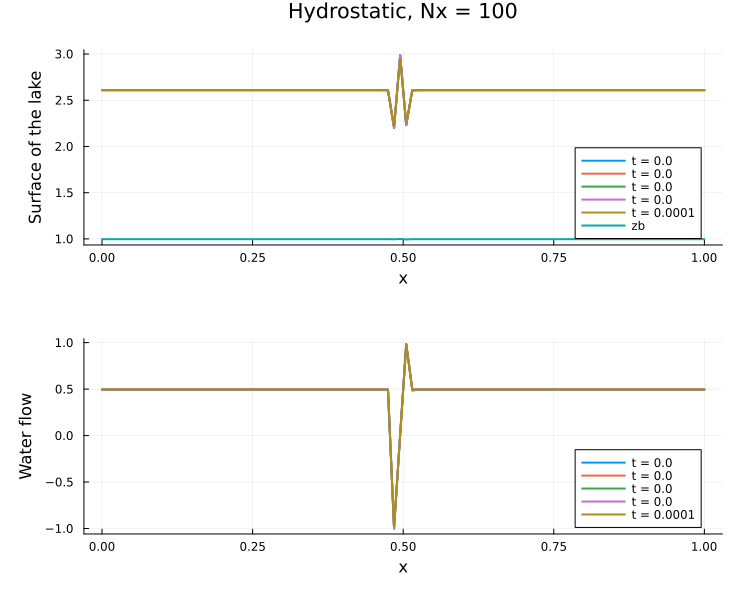

nothing

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:439 =#
                J(optimFunctional, gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.000000e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    1888

(u, up, z) = ([1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.4957368762538926; 1.6119805622276013 0.49573687

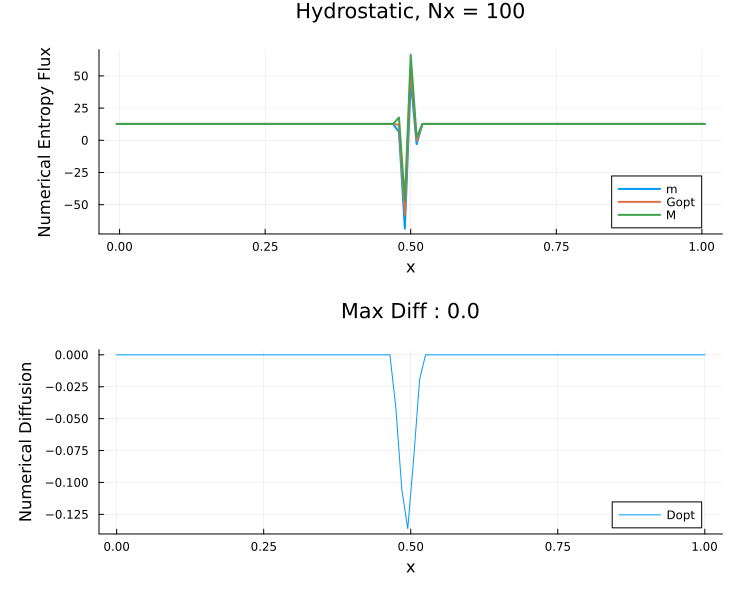

nothing

In [16]:
domain = createUnitInterval(Nx, 0.0, 0.0001)
domain.sourceVec = z

# Solving Saint-Venant for this data
fv_sol = fv_solve(domain, u_init, eq, method)
display(plot_fv_sol(fv_sol, eq, nb_plots=5))

# Optimization process

solEnt = optimize_for_entropy(u_init, domain, eq, method)
display(plot_solution(solEnt))

In [26]:
# Repeting to obtain different configurations

Nx = 20
CFL_factor = 0.5
eq = SaintVenant(flat_zb(height=0), 1e-10)

method = createHydrostatic(CFL_factor, Rusanov)
#method = Rusanov(CFL_factor)

boxBounds=[0.0 3;-1.0 1.0]
sourceBounds=[-1.0, 1.0]

nb_repetitions = 1

for k in 1:nb_repetitions

    sol = iterate_WID(Nx, eq, method; nb_it=1, boxBounds=boxBounds, sourceBounds=sourceBounds)
    @show sol.worstLowDiffVec
    
    #plotWorstWD(sol, eq)

    # # Reconstruction of the initial data from the optimization results
    # u_init, z = extendInitialDataToLinear(sol, Nx, boxBounds=boxBounds, sourceBounds=sourceBounds)

    # domain = createUnitInterval(Nx, 0.0, 0.001)
    # dt = sol.method.CFL_factor * domain.dx / CFL_cond(sol.equation, u_init) # Timestep given by CFL condition

    # # Redefining the domain with dt as final time
    # domain = createUnitInterval(Nx, 0.0, dt)
    # domain.sourceVec = z

    # # Solving Saint-Venant for this data
    # fv_sol = fv_solve(domain, u_init, eq, method)
    # display(plot_fv_sol(fv_sol, eq, nb_plots=2))

    # Optimization process


    #solEnt = optimize_for_entropy(u_init, domain, eq, method; iterations=100000, g_tol=1e-10)#, modifiedDataType=maxK())
    #plot_solution(solEnt)
    #display(title!("First timestep"))

    # Now let's consider several timesteps

    # domain = createUnitInterval(Nx, 0.0, 0.1)
    # domain.sourceVec = z

    # # Solving Saint-Venant for this data
    # fv_sol = fv_solve(domain, u_init, eq, method)
    # display(plot_fv_sol(fv_sol, eq, nb_plots=5))

    #solEnt = optimize_for_entropy(u_init, domain, eq, method; iterations=100000, g_tol=1e-10)#, modifiedDataType=maxK())
    #plot_solution(solEnt)
    #display(title!("Several timesteps"))
end

sol.worstLowDiffVec = [-2.7630815249192473]
sol.worstLowDiffVec = [-2.7633539872933124]
sol.worstLowDiffVec = [-2.827854265636905]
sol.worstLowDiffVec = [-2.829766068437781]
sol.worstLowDiffVec = [-2.818083202335366]


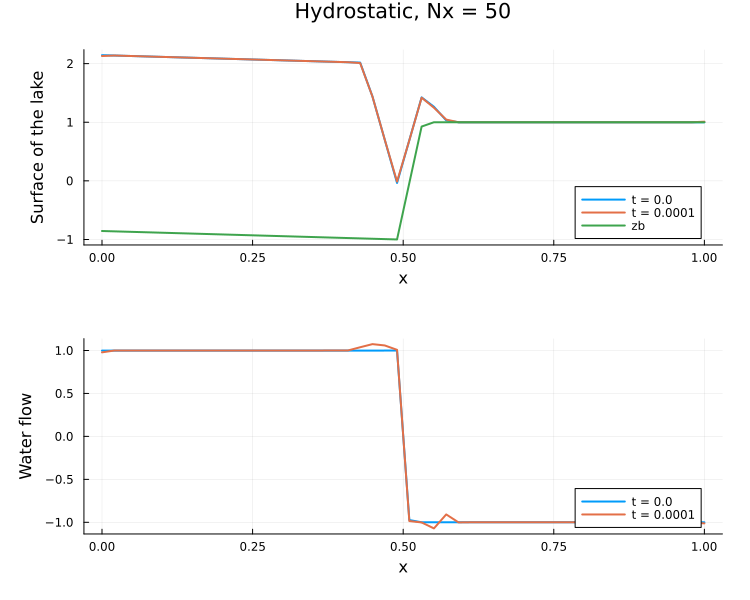

nothing

sol.worstLowDiffVec = [-2.8269136092327205]
sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:438 =#
                J(optimFunctional, gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     7.492923e+07

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-10

 * Work counters
    Seconds run:   31  (vs limit Inf)
    Iterations:    100000
    f(x) calls:    121369

Maximal diffusion value : 6479.803252130806


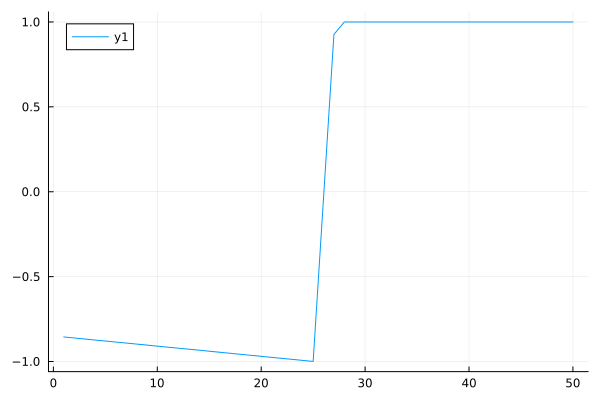

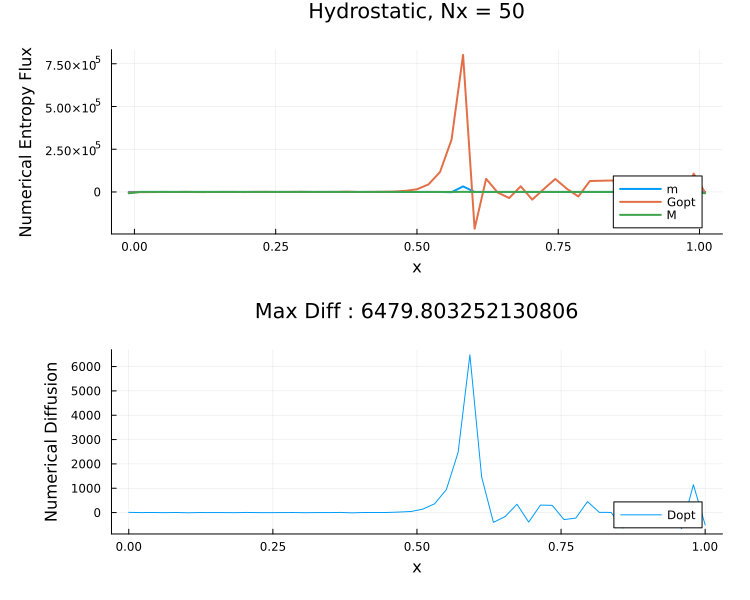

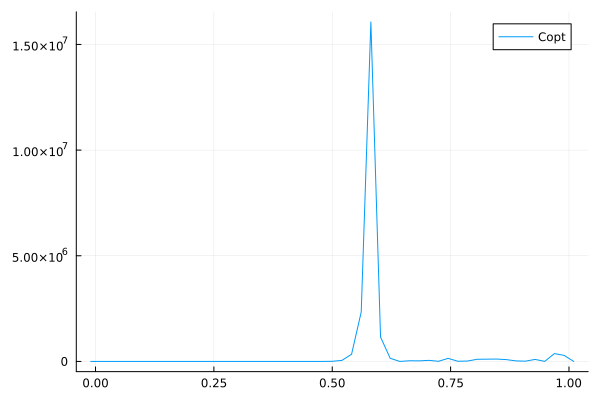

In [40]:
# Repeting to obtain different configurations

Nx = 50
CFL_factor = 0.5
eq = SaintVenant(flat_zb(height=0.0), 1e-10)
method = createHydrostatic(CFL_factor, Rusanov)
boxBounds=[0.0 3;-1.0 1.0]
sourceBounds=[-1.0, 1.0]

nb_repetitions = 1

for k in 1:nb_repetitions
    sol = iterate_WID(Nx, eq, method; nb_it=1, boxBounds=boxBounds, sourceBounds=sourceBounds)
    @show sol.worstLowDiffVec
    # Reconstruction of the initial data from the optimization results
    #u_init, z = extendInitialDataToK(sol, Nx)
    u_init, z = extendInitialDataToLinear(sol, Nx, boxBounds=boxBounds, sourceBounds=sourceBounds)

    # # Optimization at last timestep
    # domain = createUnitInterval(Nx, 0.0, 0.5)
    # domain.sourceVec = z
    # # fv_sol = fv_solve(domain, u_init, eq, method)
    # # display(plot_fv_sol(fv_sol, eq, nb_plots=5))
    # solEnt = optimize_for_entropy(u_init, domain, eq, method; iterations=100000, g_tol=1e-10)#, modifiedDataType=maxK())
    # plot_solution(solEnt)

    # Optimization at first timestep
    dt = sol.method.CFL_factor * domain.dx / CFL_cond(sol.equation, u_init) # Timestep given by CFL condition
    domain = createUnitInterval(Nx, 0.0, 0.0001)# Redefining the domain with dt as final time
    domain.sourceVec = z
    fv_sol = fv_solve(domain, u_init, eq, method)
    display(plot_fv_sol(fv_sol, eq, nb_plots=2))
    solEnt = optimize_for_entropy(u_init, domain, eq, method; iterations=100000, g_tol=1e-10)#, modifiedDataType=maxK())
    plot_solution(solEnt)
    
    display(plot(solEnt.domain.interfaces, solEnt.Copt, label="Copt"))
end